### Non Linear Convection

In this section we modify the equation to make it non linear by replacing the speed $c$ with the field itself

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys

%matplotlib inline

class field:
    def __init__(self, nx, len_x, nt, len_t):
        
        dx = len_x/(nx-1)
        dt = round(len_t/(nt-1),3)
        
        x = np.arange(0, len_x+dx, dx)
        t = np.arange(0, len_t+dt, dt)
        
        self.x = x
        self.t = t
        self.nx = nx
        self.dx = dx
        self.nt = nt
        self.dt = dt
        self.grid = np.zeros((nx,nt))

In [23]:
ns_field = field(41,2,25,.6)

ns_field.grid[int(0.5/ns_field.dx) : int(1 / ns_field.dx + 1), 0] = 2
ns_field.grid[0 : int(0.5/ns_field.dx), 0] = 1
ns_field.grid[int(1 / ns_field.dx + 1) :, 0] = 1

In [24]:
def update(field):
    grid = field.grid
    nt = field.nt
    nx = field.nx
    dt = field.dt
    dx = field.dx
    for i in range(nt-1):
        for j in range(nx-1):
            grid[j, i+1] = grid[j,i] - grid[j,i] * (dt / dx) * (grid[j,i]-grid[j-1,i])

In [25]:
update(ns_field)

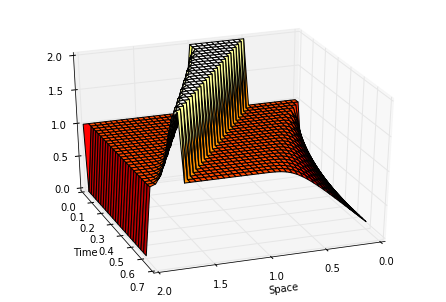

In [32]:
from mpl_toolkits.mplot3d import Axes3D

def plot(field):
    grid = field.grid
    t = field.t
    x = field.x
    
    ts, xs = np.meshgrid(t,x)

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(xs, ts, grid, rstride=1, cstride=1, cmap='hot')
    ax.set_xlabel("Space")
    ax.set_ylabel("Time")
    
    ax.view_init(30, 70)
    plt.show()
        

plot(ns_field)